In [8]:
import math
import matplotlib.pyplot as plt
import numpy as np
from pyads1292 import *
import matplotlib.gridspec as gridspec
import scipy as sci

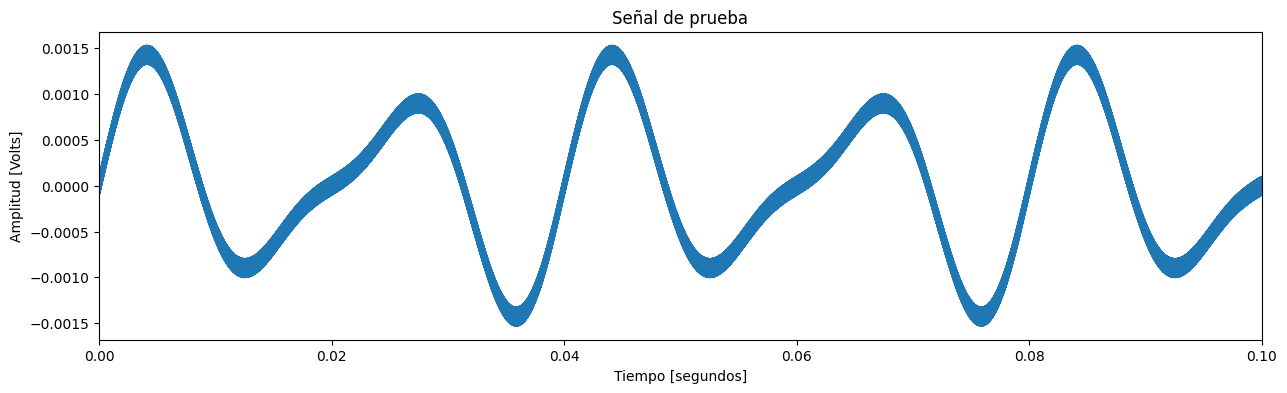

In [9]:
ftest = 50
N = 2*256000
fs = N

A1 = 0.001
A2 = A1/2
A3 = A1/10

ft1 = 50
ft2 = 1.5*ft1
ft3 = 1000*ft1

t = np.linspace(0, N/fs, N)
u = A1*np.sin(2*np.pi*ft1*t)+A2*np.sin(2*np.pi*ft2*t)+A3*np.sin(2*np.pi*ft3*t)

fig = plt.figure(figsize=(15, 4))
plt.plot(t, u)
plt.title('Señal de prueba')
plt.xlabel('Tiempo [segundos]')
plt.ylabel('Amplitud [Volts]')
plt.xlim([0,0.1])
plt.show()

In [10]:
pyads1292 = Pyads1292()

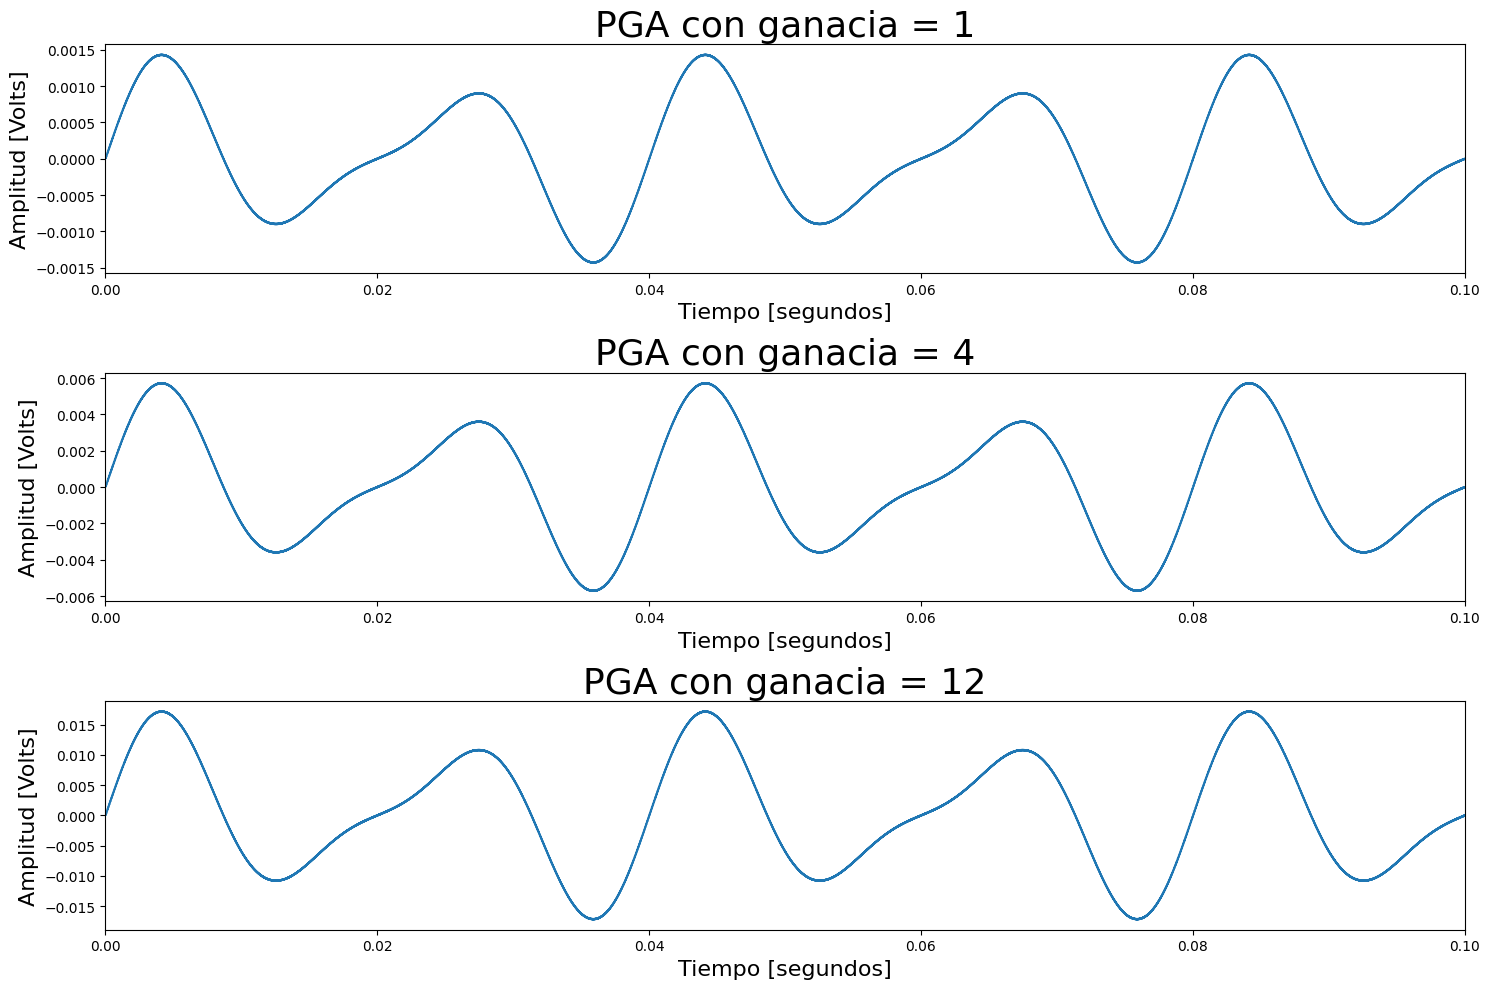

In [11]:
pga_values = [1, 4, 12]

fig, axs = plt.subplots(3, 1,figsize=(15, 10))
i = 0

for ganancia in pga_values:
    
    pyads1292.gain = ganancia
    u_pga = pyads1292.pga(u, fs)

    axs[i].plot(t, u_pga)
    axs[i].set_xlim([0,0.1])
    axs[i].set_title('PGA con ganacia = '+str(ganancia), fontsize=26)
    axs[i].set_xlabel('Tiempo [segundos]', fontsize=16)
    axs[i].set_ylabel('Amplitud [Volts]', fontsize=16)
    
    i+=1

plt.tight_layout()
plt.show()

4
512000
128000


C:\Users\danie\anaconda3\envs\Proyecto\lib\site-packages\deltasigma-0.2.6-py3.8.egg\deltasigma\_simulateDSM.py:216: UserWarning: Using a slow implementation of simulateDSM
Refer to the docs for how to switch to a fast one
  warn('Using a slow implementation of simulateDSM\n' +


128000


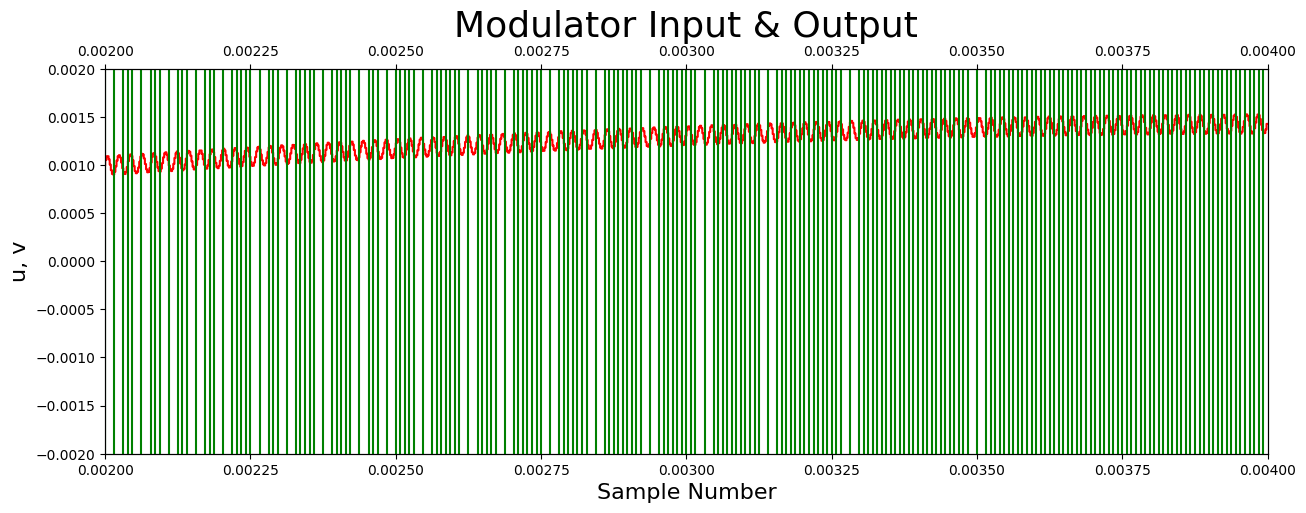

In [13]:
pyads1292.gain = 1
v, xn, xmax, y = pyads1292.modulacion(u, fs)
print(len(v))

fig = plt.figure(figsize=(15, 5))
t = np.linspace(0, len(u)/fs, len(u))
ax=fig.add_subplot( 1, 1, 1 )
ax.step(t, u,'r')
plt.xlim((0.002,0.004))
tx = ax.twiny()
t = np.linspace(0, len(v)/pyads1292.fmod, len(v))
tx.step(t, v, 'g')
plt.xlim((0.002,0.004))
plt.ylim((-0.002,0.002))
ax.set_xlabel('Sample Number', fontsize=16)
ax.set_ylabel('u, v', fontsize=16)
plt.title('Modulator Input & Output', fontsize=26)
plt.show()

4
512000
128000
500
-0.0013592243194580078
4
512000
128000
500
-0.00518643856048584
4
512000
128000
500
-0.015354275703430176


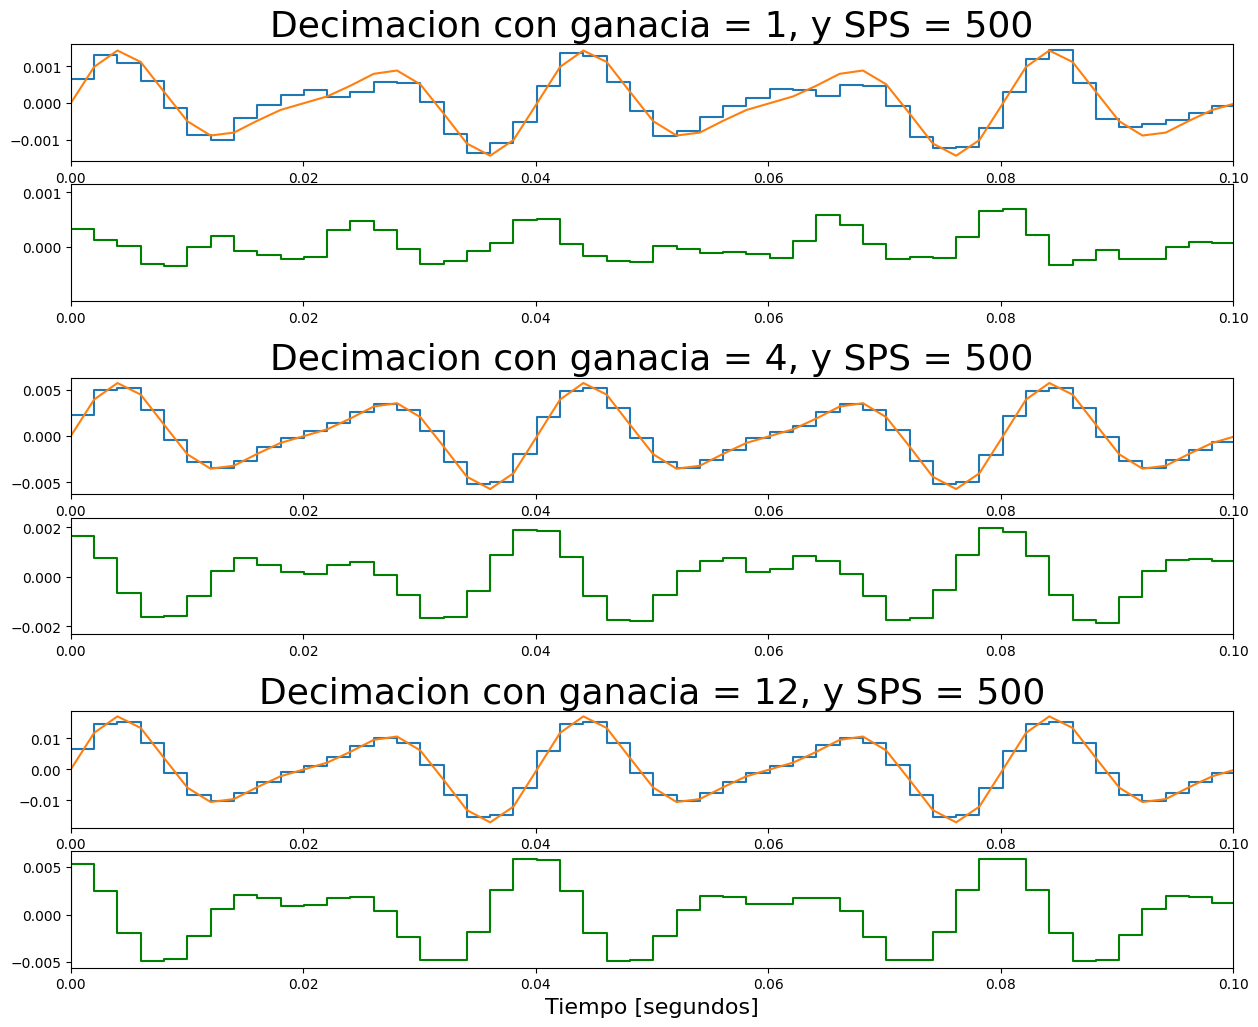

In [12]:
pyads1292.fsps = 500

fig = plt.figure(figsize=(15, 10))
subfigs = fig.subfigures(3, 1)

i=0

for outerind, subfig in enumerate(subfigs.flat):
    
    gain = pga_values[i]
    
    pyads1292.gain = gain
    
    u_pga = pyads1292.pga(u, fs)
    u_decimate = pyads1292.decimate(u, fs)
    
    
    Ndem = max(u_decimate.shape)
    t = np.linspace(0, Ndem/pyads1292.fsps, Ndem)
    
    axs = subfig.subplots(2, 1)
    axs[0].step(t, u_decimate)
    axs[0].plot(t, u_pga[::math.ceil(len(u_pga)/len(u_decimate))])
    axs[0].set_title('Decimacion con ganacia = '+str(gain)+', y SPS = '+str(pyads1292.fsps), fontsize=26)
    axs[0].set_xlim((0,0.1))
    axs[1].step(t, u_pga[::math.ceil(len(u_pga)/len(u_decimate))] - u_decimate, 'g')
    axs[1].set_xlim((0,0.1))
    print(np.min(u_decimate))
    i+=1

axs[1].set_xlabel('Tiempo [segundos]', fontsize=16)
plt.show()



# print(u_decimate[123])
# print(np.min(u_decimate))
# print(np.min(u_decimate)*8388608)

4
512000
128000
2000
-0.001556396484375
4
512000
128000
2000
-0.005950927734375
4
512000
128000
2000
-0.017242431640625


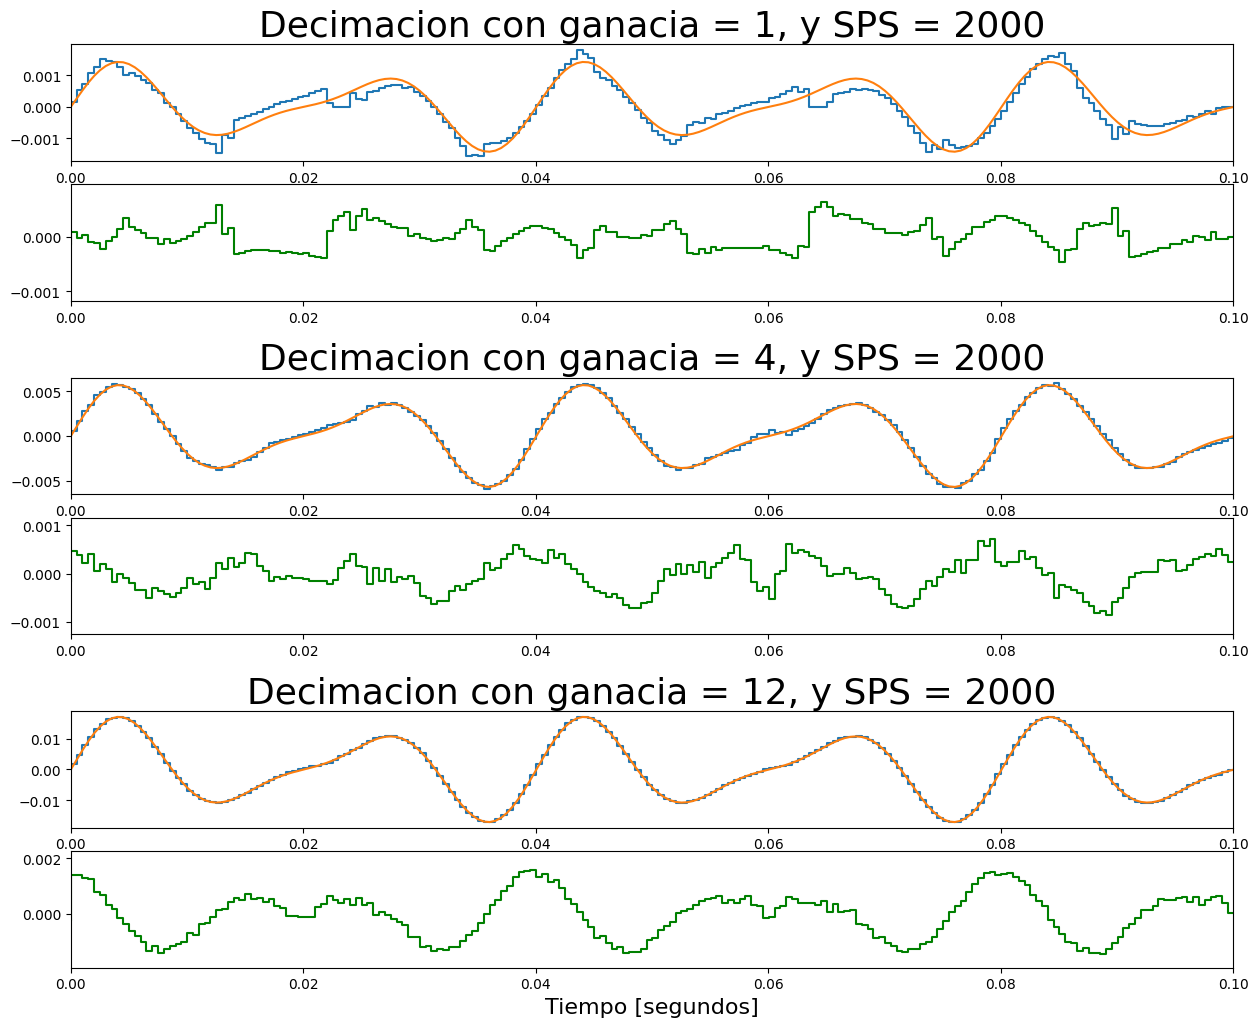

In [13]:
pyads1292.fsps = 2000

fig = plt.figure(figsize=(15, 10))
subfigs = fig.subfigures(3, 1)

i=0

for outerind, subfig in enumerate(subfigs.flat):
    
    gain = pga_values[i]
    
    pyads1292.gain = gain
    
    u_pga = pyads1292.pga(u, fs)
    u_decimate = pyads1292.decimate(u, fs)
    
    
    Ndem = max(u_decimate.shape)
    t = np.linspace(0, Ndem/pyads1292.fsps, Ndem)
    
    axs = subfig.subplots(2, 1)
    axs[0].step(t, u_decimate)
    axs[0].plot(t, u_pga[::math.ceil(len(u_pga)/len(u_decimate))])
    axs[0].set_title('Decimacion con ganacia = '+str(gain)+', y SPS = '+str(pyads1292.fsps), fontsize=26)
    axs[0].set_xlim((0,0.1))
    axs[1].step(t, u_pga[::math.ceil(len(u_pga)/len(u_decimate))] - u_decimate, 'g')
    axs[1].set_xlim((0,0.1))
    print(np.min(u_decimate))
    i+=1

axs[1].set_xlabel('Tiempo [segundos]', fontsize=16)
plt.show()


4
512000
128000
8000
-0.0078125
4
512000
128000
8000
-0.01220703125
4
512000
128000
8000
-0.0234375


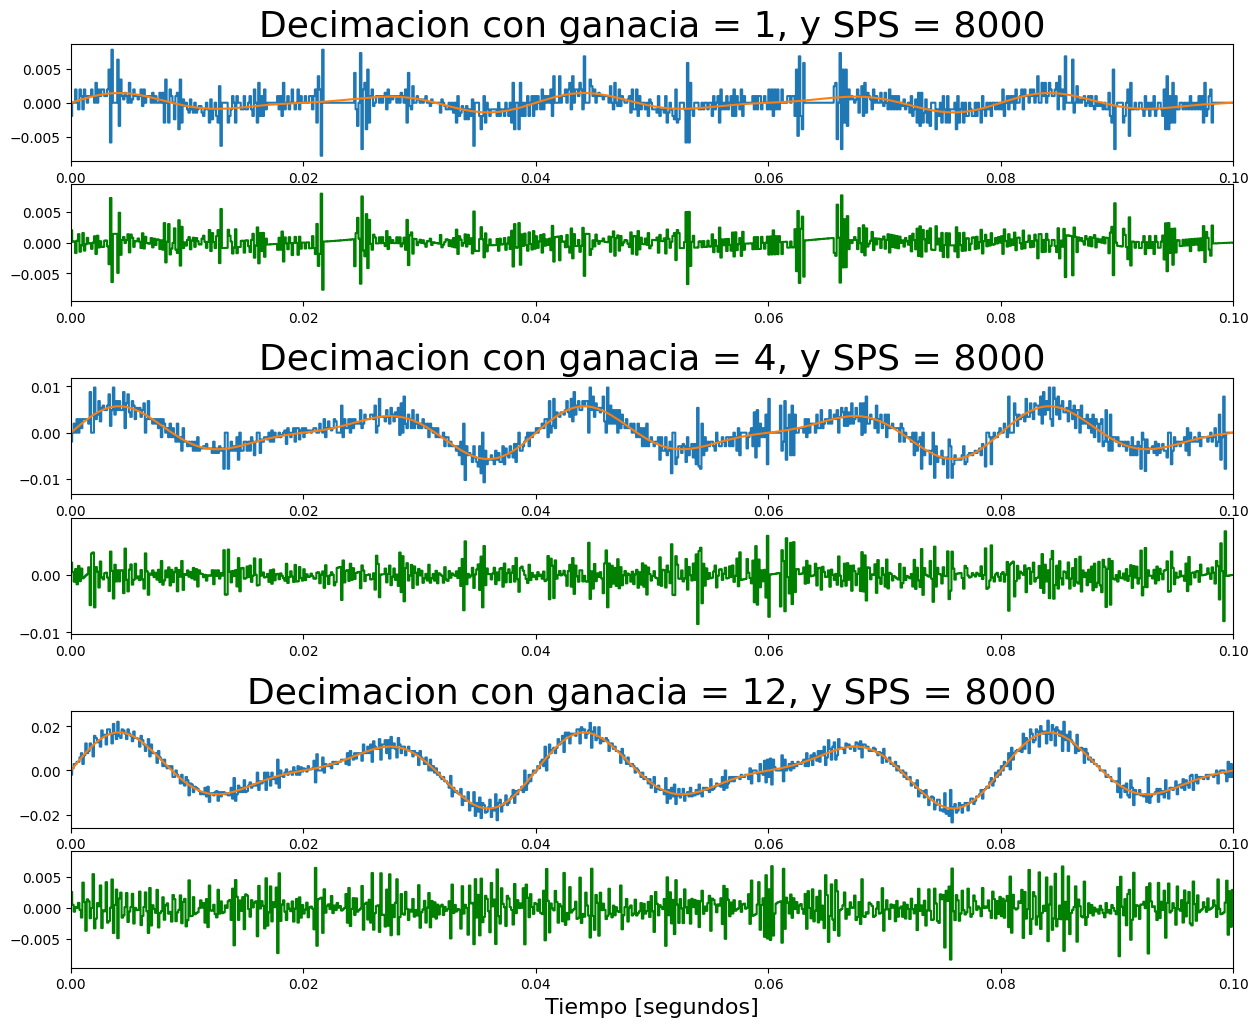

In [14]:
pyads1292.fsps = 8000

fig = plt.figure(figsize=(15, 10))
subfigs = fig.subfigures(3, 1)

i=0

for outerind, subfig in enumerate(subfigs.flat):
    
    gain = pga_values[i]
    
    pyads1292.gain = gain
    
    u_pga = pyads1292.pga(u, fs)
    u_decimate = pyads1292.decimate(u, fs)
    
    
    Ndem = max(u_decimate.shape)
    t = np.linspace(0, Ndem/pyads1292.fsps, Ndem)
    
    axs = subfig.subplots(2, 1)
    axs[0].step(t, u_decimate)
    axs[0].plot(t, u_pga[::math.ceil(len(u_pga)/len(u_decimate))])
    axs[0].set_title('Decimacion con ganacia = '+str(gain)+', y SPS = '+str(pyads1292.fsps), fontsize=26)
    axs[0].set_xlim((0,0.1))
    axs[1].step(t, u_pga[::math.ceil(len(u_pga)/len(u_decimate))] - u_decimate, 'g')
    axs[1].set_xlim((0,0.1))
    print(np.min(u_decimate))
    i+=1

axs[1].set_xlabel('Tiempo [segundos]', fontsize=16)
plt.show()

2
256000
128000


C:\Users\danie\anaconda3\envs\Proyecto\lib\site-packages\deltasigma-0.2.6-py3.8.egg\deltasigma\_simulateDSM.py:216: UserWarning: Using a slow implementation of simulateDSM
Refer to the docs for how to switch to a fast one
  warn('Using a slow implementation of simulateDSM\n' +


8000


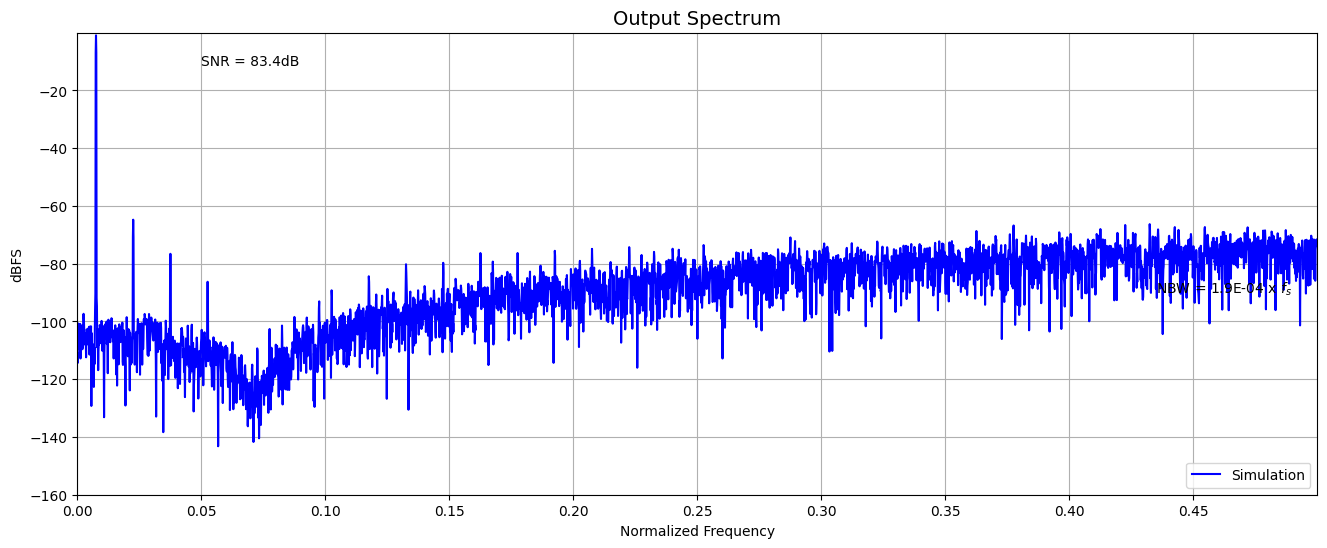

13.556964097416694


In [4]:
pyads1292.fsps = 8000
pyads1292.gain = 1

ftest = 60
N = 256000
fs = N
t = np.linspace(0, N/fs, N)
u_test = 0.9*np.sin(2*np.pi*ftest*t)      #Senal de testeo

ENOB = pyads1292.osr(u_test, 60, fs)
print(ENOB)